# HEART DISESASE DATA SET

This particular dataset consist of 4 databases :

Cleveland

Hungary

Switzerland

VA Long Beach

Creater of this dataset aare as follows:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 

2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

These databases contain a total of 76 attributes, all these are published experiments which are usig a subset of 14 of them.

Withregards to the given dataset the Cleveland database is the only one which has been used for the prediction and machine learning. Here the target is the "goal" field which is showing the presence of heart disease in the patient or not it is ranging from 0 to 4 where "0" is (No Presence)

Many fields such as name , security number and other fields have been given with the dummy values. The Attributes information are as bellow:

Only 14 attributes used: 
1. #3 (age)---> Age in Years

2. #4 (sex) ---> 1= Male , 0=Female

3. #9 (cp) ---> Chest pain

4. #10 (trestbps) ---> Resting blood pressure (in mm Hg on admission to the hospital)

5. #12 (chol) ---> Serum cholestoral in mg/dl

6. #16 (fbs) ---> (Fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

7. #19 (restecg) ---> Resting electrocardiographic results

8. #32 (thalach) ---> Maximum heart rate achieved

9. #38 (exang) ---> Exercise induced angina (1 = yes; 0 = no)

10. #40 (oldpeak) ---> ST depression induced by exercise relative to rest

11. #41 (slope) ---> The slope of the peak exercise ST segment

12. #44 (ca) ---> Number of major vessels (0-3) colored by flourosopy

13. #51 (thal) ---> 3 = normal; 6 = fixed defect; 7 = reversable defect

14. #58 (num) (the predicted attribute)---> TARGET 1 or 0 


Importing or calling all necessary models

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Dataset

LOADING,
CLEANING,
FORMATTING

In [247]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [248]:
df=pd.DataFrame(data=data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [249]:
# first 10 rows of the dataset:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [250]:
#last 10 rows of the dataset:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [251]:
#shape of the dataset:  1025 rows and 14 columns
df.shape

(1025, 14)

In [252]:
#what kind of information provided by our given datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [253]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [254]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Description shows that the average age of the patients here is almost 54 years, average of sex ratio shows that 69% are male patient also the average of target is 50% which tell us that almost half of the patient have heart disease and other half doesnt have heart disease.

On the other hand we can see the min and maximum values of each variables, such as min age is 29 years and max is 77. Through this describe we can analyse other fields also.

In [255]:
#data types of all the variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Here we are having 1 float and other 13 columns data are integer.

Finding the Uniqueness in some of the data for double check: 

In [256]:
df.sex.unique()

array([1, 0])

In [257]:
df.target.unique()

array([0, 1])

In [258]:
df.cp.unique()

array([0, 1, 2, 3])

In [259]:
df.fbs.unique()

array([0, 1])

In [260]:
df.thal.unique()

array([3, 2, 1, 0])

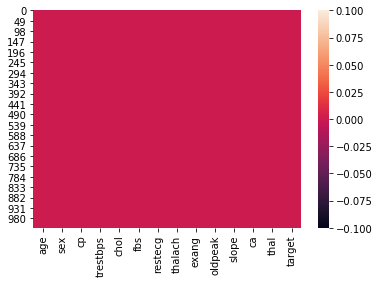

In [261]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).


In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [262]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

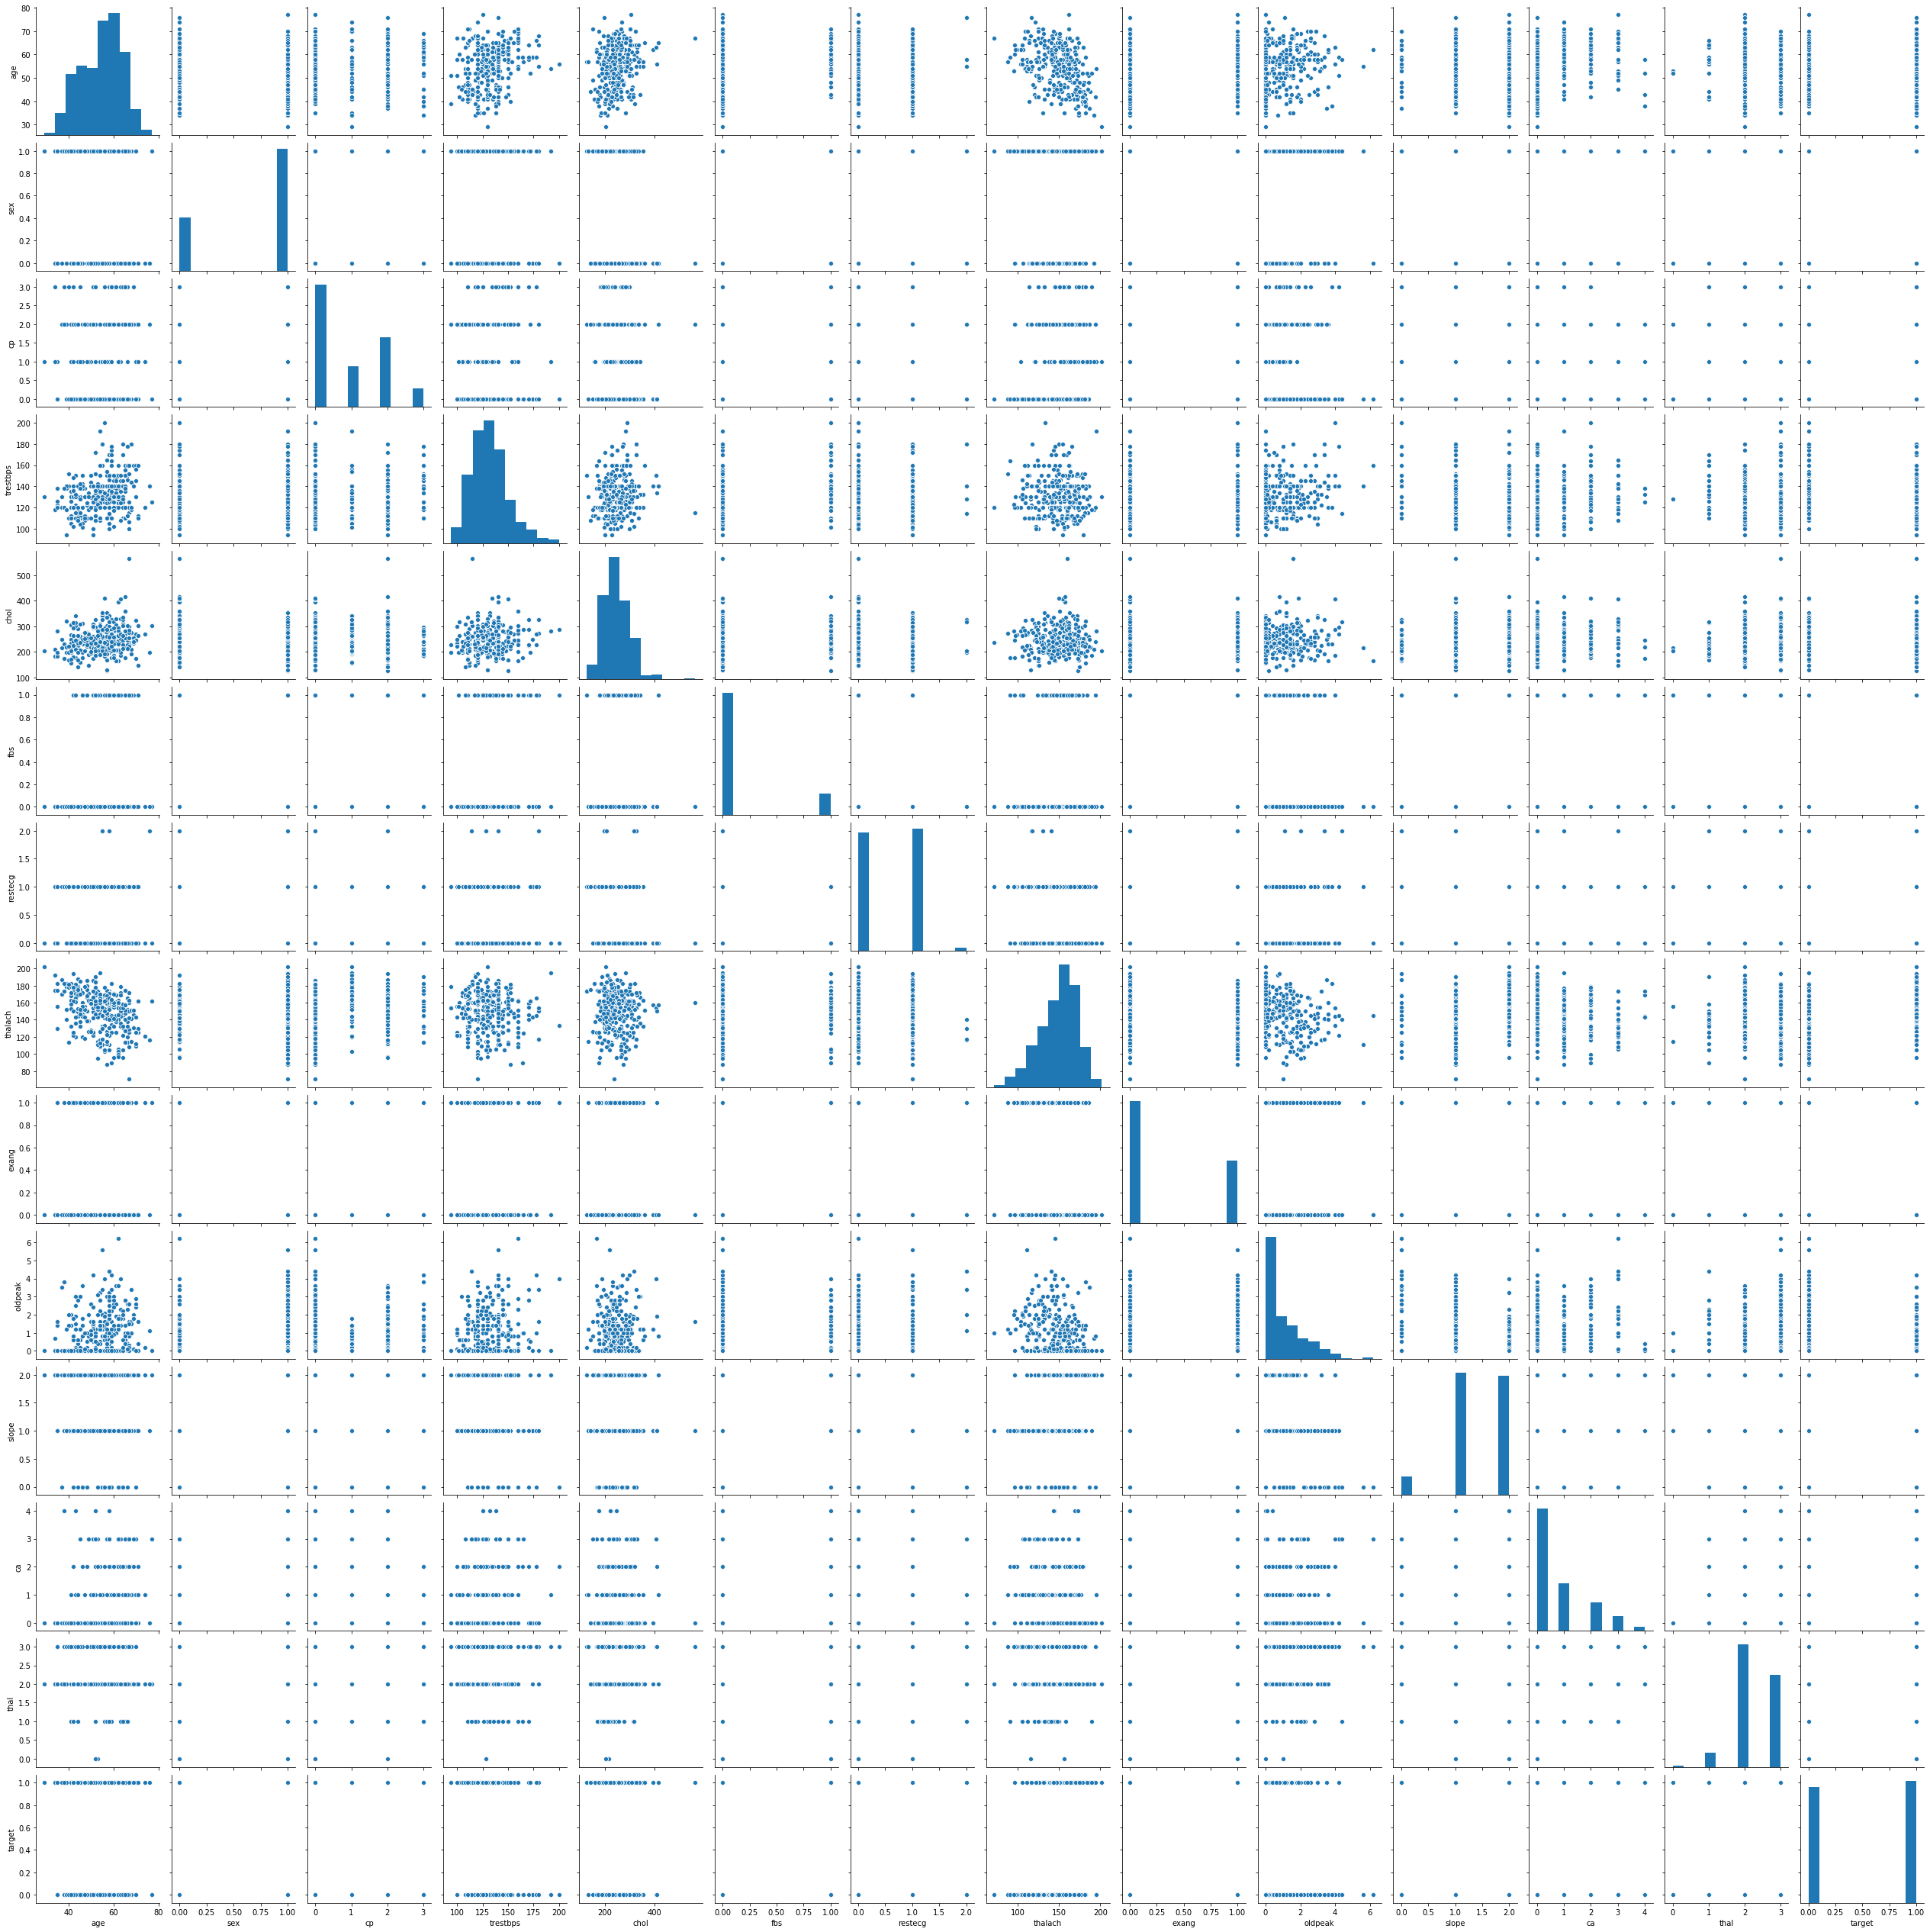

In [263]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.


Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are :

'age','sex','cp',

'trestbps','chol','fbs',

'restecg','ca','thal',

'target'

These fields are some what showing positive or neutral correlation with each other.
        
        
The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation.

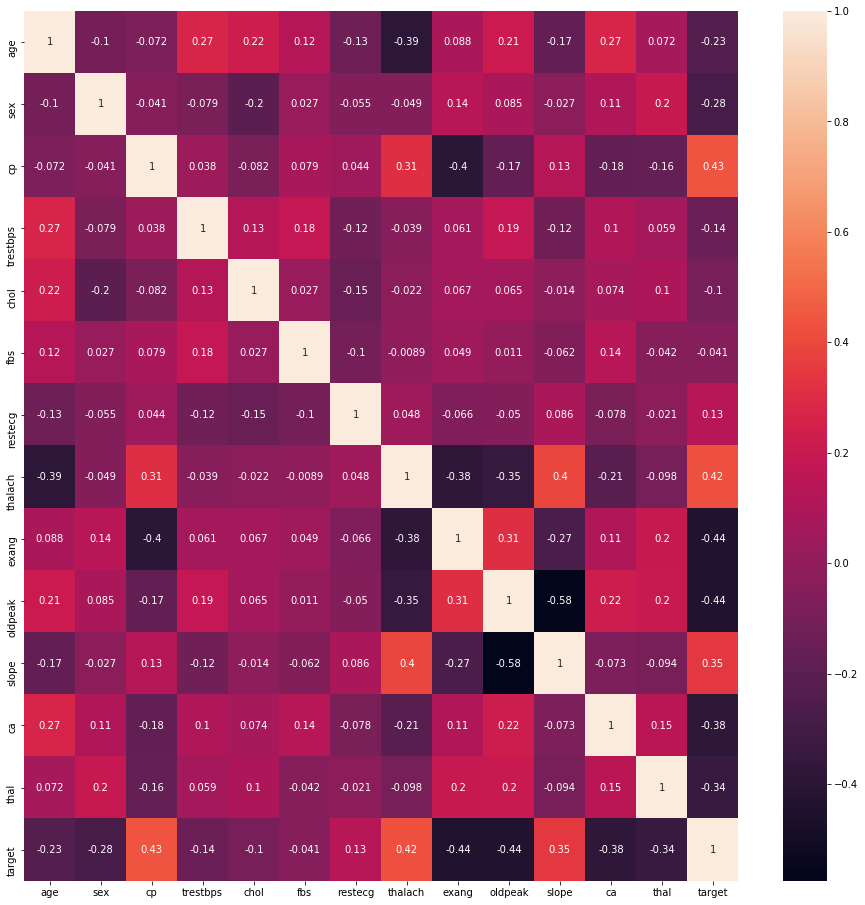

In [264]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [265]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'slope', 'ca', 'thal', 'target'],
       dtype='object'),
 dtype('float64'): Index(['oldpeak'], dtype='object')}

Grouping by data types of the given fields, that is..
Int64 AND Float

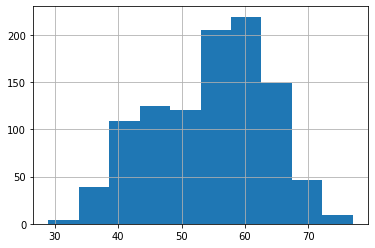

In [266]:
df.age.hist()

The above histogram shows the maximum number of age distribution of the patients which are lying between at the age range from 55 years to 65 Years.

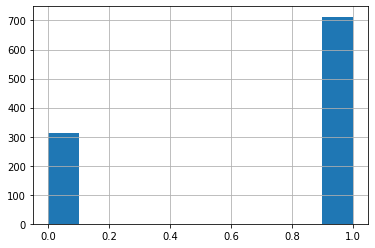

In [267]:
df.sex.hist()

More than 700 patients are male with respect to the female holding around 310.

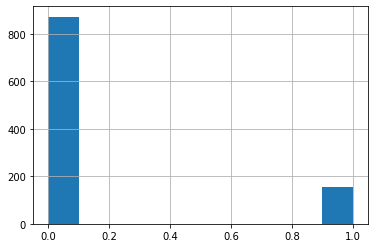

In [268]:
df.fbs.hist()

Fasting blood sugar &gt; 120 mg/dl =true is for only less than 200 of the total patients where as other patients having 0 = false.

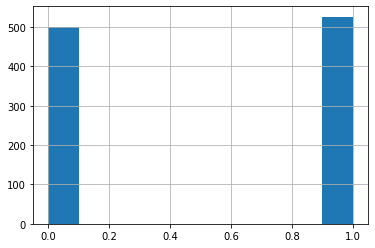

In [269]:
df.target.hist()

Patients diagnosed with heart disease and patients did not diagnosed with heart disease are approximately 50%.

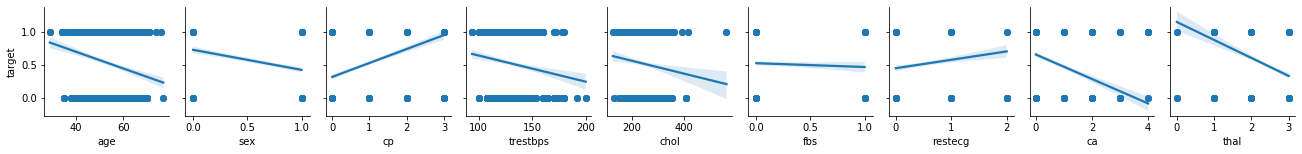

In [270]:
sns.pairplot(df, x_vars=['age','sex','cp','trestbps','chol','fbs','restecg','ca','thal'], y_vars='target', size=2, aspect=1, kind='reg')

Plotting the above and below graph, in order to know that how the variables are corelating with "target" field, where we see that :

Positive and Neutral correlation:

'age','sex','cp',
'trestbps','chol','fbs',
'restecg','ca','thalach',
'exang','slope'.

Some of the fields are negatively correlated with the target too :

'oldpeak','thal'.


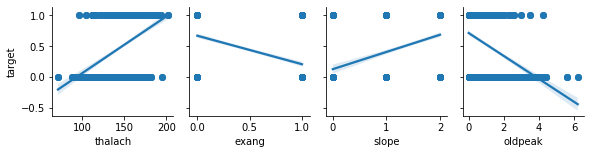

In [271]:
sns.pairplot(df, x_vars=['thalach','exang','slope','oldpeak'], y_vars='target', size=2, aspect=1, kind='reg')

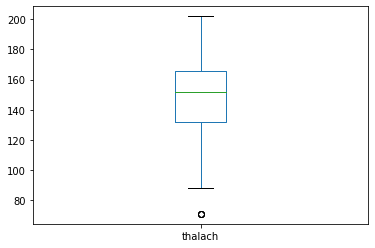

In [272]:
df['thalach'].plot.box()

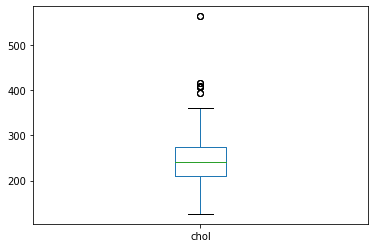

In [273]:
df['chol'].plot.box()

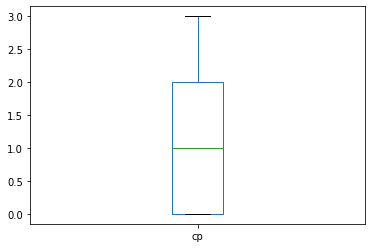

In [274]:
df['cp'].plot.box()

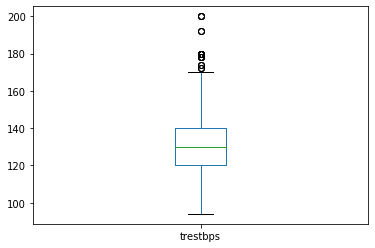

In [275]:
df['trestbps'].plot.box()

The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables.
In some of the variables such as trestbps, thalach, chol ; The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

We are going to treat this with z score:

# Removing Outliers

Removing the outliers from the data by using Z_SCORE

In [276]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(1025, 14)


In [277]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(969, 14)


New shape of our new data is (969,14) which has removed some of the outlliers present in our previous data.

# Checking Skewness

This tecnique is implemented to watchout for any data that is skewed or not.

In [302]:
df1.skew()

age        -0.231922
sex        -0.883378
cp          0.534378
trestbps    0.545720
chol        0.250140
fbs         2.037533
restecg     0.184201
thalach    -0.435104
exang       0.688561
oldpeak     0.292036
slope      -0.475267
ca          0.706179
thal       -0.250235
target     -0.072399
dtype: float64

In [303]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [304]:
#Skewness Removed
df1.skew()

age        -0.231922
sex        -0.883378
cp          0.534378
trestbps    0.545720
chol        0.250140
fbs         2.037533
restecg     0.184201
thalach    -0.435104
exang       0.688561
oldpeak     0.292036
slope      -0.475267
ca          0.533166
thal       -0.250235
target     -0.072399
dtype: float64

# Assigning X AND Y Variables:

In [305]:
df1.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0.000000,1,168,0.000000,0.693147,2,0.741276,3,0
1,53,1,0,140,203,0.526589,0,155,0.526589,1.410987,0,0.000000,3,0


In [282]:
x=df1.iloc[:,:13]
x.shape
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0.000000,1,168,0.000000,0.693147,2,1.098612,3
1,53,1,0,140,203,0.693147,0,155,0.693147,1.410987,0,0.000000,3
2,70,1,0,145,174,0.000000,1,125,0.693147,1.280934,0,0.000000,3
3,61,1,0,148,203,0.000000,1,161,0.000000,0.000000,2,0.693147,3
4,62,0,0,138,294,0.693147,1,106,0.000000,1.064711,1,1.386294,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0.000000,1,164,0.693147,0.000000,2,0.000000,2
1021,60,1,0,125,258,0.000000,0,141,0.693147,1.335001,1,0.693147,3
1022,47,1,0,110,275,0.000000,0,118,0.693147,0.693147,1,0.693147,2
1023,50,0,0,110,254,0.000000,0,159,0.000000,0.000000,2,0.000000,2


In [283]:
y=df1.iloc[:,-1]
y.shape
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 969, dtype: int64

# MODEL SELECTION


Using different types of model in oder to acquire optimum solution:

# Linnear Regression

In [284]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.5160276414254785
r2_score corresponding to random state:  43 is:  0.5214236820698159
r2_score corresponding to random state:  44 is:  0.5107837661127418
r2_score corresponding to random state:  45 is:  0.52314886640623
r2_score corresponding to random state:  46 is:  0.5220816241674664
r2_score corresponding to random state:  47 is:  0.526812643538847
r2_score corresponding to random state:  48 is:  0.5502676508334738
r2_score corresponding to random state:  49 is:  0.5227088484216051
r2_score corresponding to random state:  50 is:  0.5433621728941784
r2_score corresponding to random state:  51 is:  0.5038970177253439
r2_score corresponding to random state:  52 is:  0.4994791263059676
r2_score corresponding to random state:  53 is:  0.5340105057845705
r2_score corresponding to random state:  54 is:  0.52987062883539
r2_score corresponding to random state:  55 is:  0.5224126340208359
r2_score corresponding to random state:  56 is:  0.54

# Logistic Regression
# Gaussian NB
# SVC
# Decision Tree Classifier
# KNeighbors Classifier

In [285]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=42,stratify=y)

In [286]:
print(x_train.shape,x_test.shape)

(678, 13) (291, 13)


In [287]:
print(y_train.shape,y_test.shape)

(678,) (291,)


In [288]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
LOR=LogisticRegression()
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [289]:
models= []
models.append(('LogisticRegression',LOR))
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** LogisticRegression ****************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ACCURACY SCORE IS =  0.8625429553264605


CROSS_VAL_SCORE =  0.8616731099656357


ROC_AUC_SCORE =  0.859484389782403


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.92      0.78      0.84       140
           1       0.82      0.94      0.88       151

    accuracy                           0.86       291
   macro avg       0.87      0.86      0.86       291
weighted avg       0.87      0.86      0.86       291



CONFUSION MATRIX [[109  31]
 [  9 142]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


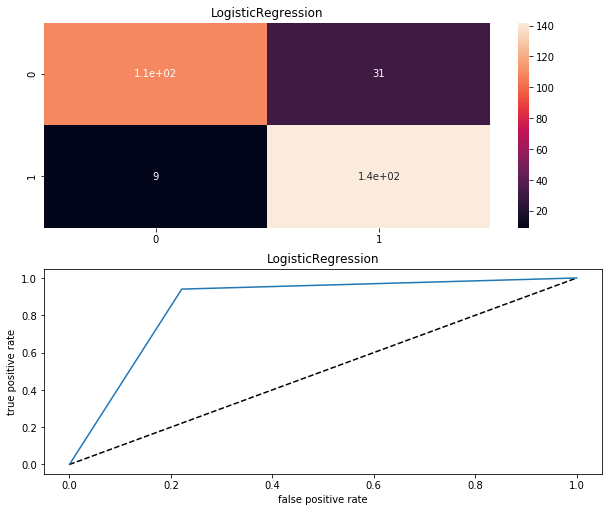




**************** GaussianNB ****************


GaussianNB(priors=None, var_smoothing=1e-09)


ACCURACY SCORE IS =  0.8384879725085911


CROSS_VAL_SCORE =  0.833838058419244


ROC_AUC_SCORE =  0.8368259224219489


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.86      0.79      0.83       140
           1       0.82      0.88      0.85       151

    accuracy                           0.84       291
   macro avg       0.84      0.84      0.84       291
weighted avg       0.84      0.84      0.84       291



CONFUSION MATRIX [[111  29]
 [ 18 133]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


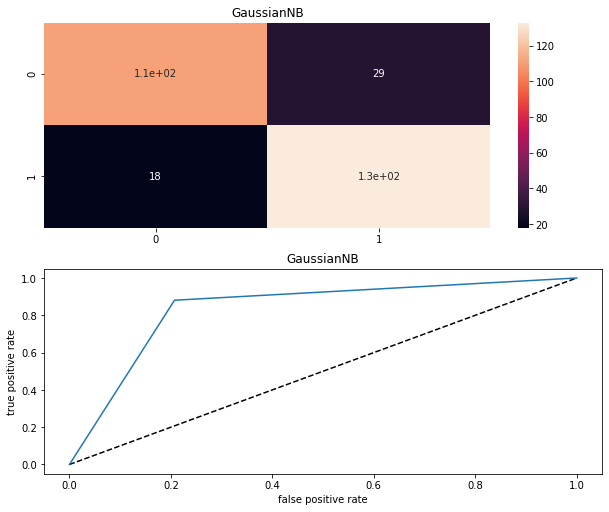




**************** SVC ****************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


ACCURACY SCORE IS =  0.7044673539518901


CROSS_VAL_SCORE =  0.7068943298969073


ROC_AUC_SCORE =  0.7009224219489121


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.73      0.61      0.66       140
           1       0.69      0.79      0.74       151

    accuracy                           0.70       291
   macro avg       0.71      0.70      0.70       291
weighted avg       0.71      0.70      0.70       291



CONFUSION MATRIX [[ 85  55]
 [ 31 120]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


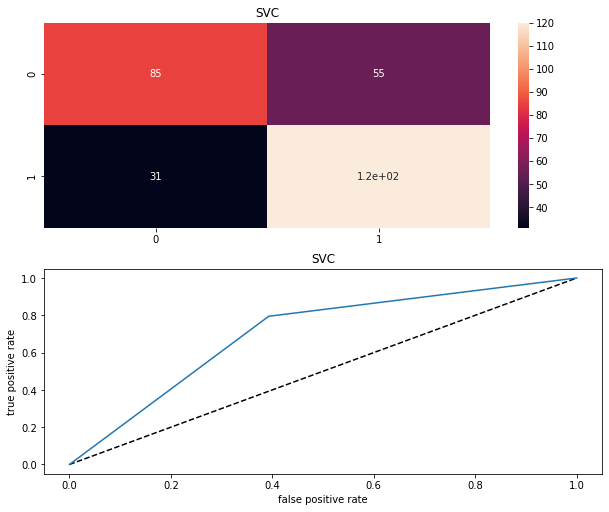




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


ACCURACY SCORE IS =  0.9759450171821306


CROSS_VAL_SCORE =  0.9938144329896907


ROC_AUC_SCORE =  0.9757805108798486


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.98      0.97      0.97       140
           1       0.97      0.98      0.98       151

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



CONFUSION MATRIX [[136   4]
 [  3 148

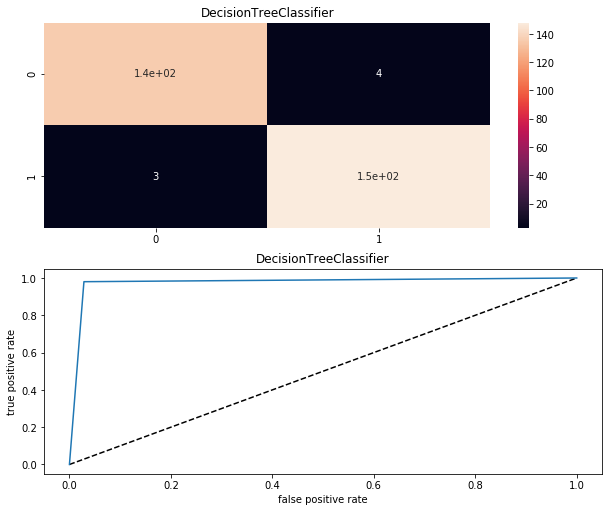




**************** KNeighborsClassifie ****************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


ACCURACY SCORE IS =  0.7147766323024055


CROSS_VAL_SCORE =  0.752319587628866


ROC_AUC_SCORE =  0.713197729422895


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.72      0.67      0.69       140
           1       0.71      0.75      0.73       151

    accuracy                           0.71       291
   macro avg       0.72      0.71      0.71       291
weighted avg       0.71      0.71      0.71       291



CONFUSION MATRIX [[ 94  46]
 [ 37 114]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


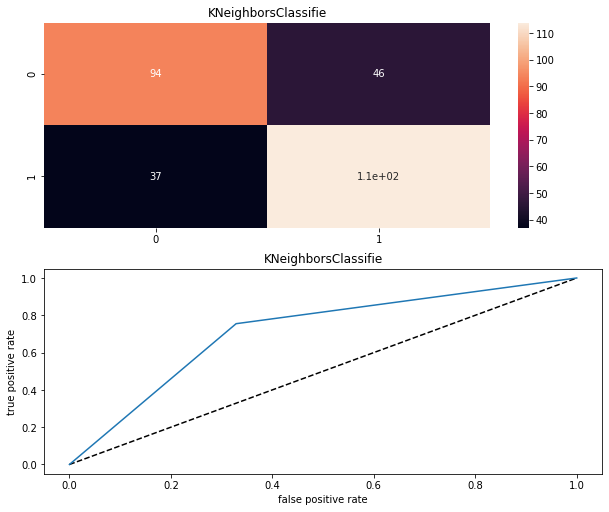

In [290]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

# Results

In [291]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,86.254296,86.167311,85.948439
1,GaussianNB,83.848797,83.383806,83.682592
2,SVC,70.446735,70.689433,70.092242
3,DecisionTreeClassifier,97.594502,99.381443,97.578051
4,KNeighborsClassifie,71.477663,75.231959,71.319773


In all the above 5 models best performance is done by DECISION TREE CLASSIFIER as the accuracy score is 97.59% and cross_val_score is around 99.38% and roc_auc_score is 97.57%

Still this is not the best for what we can do for this dataset.


Thus, DTC is realy close to the rfr1 that is Random forest classifier, as the accuracy score for pridicting is 100% for Random Forest Classifier. We also know that obtaining 100% is the ideal situation for any dataset still we are going with the Random forest regressor model Following further--:>>>>>>>>>>>>>>>>>>

# Errors:--->

In [292]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.5374607461406996
Mean Squared error :  0.3973953277347682
RMSE is :  0.6303929946745667


When your accuracy score is not up to the mark and in oreder to increase the accuracy score we are going to use here RANDOM FOREST REGRESSOR and GRADIENT BOOSTING REGRESSOR in order to increase the score for the above tests.

These boosting and bagging techniques will re enable or boost the internal parameters inorder to increse the accuracy score of the model. 

# Random Forest Regressor With GridSearchCV:--->

In [293]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [294]:
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 30}

In [295]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=42,stratify=y)
rfr1=RandomForestRegressor(bootstrap=False,max_features='sqrt',min_samples_split=2,n_estimators=30)
rfr1.fit(x_train, y_train)
rfr1.score(x_train,y_train)
pred=rfr1.predict(x_test)

In [296]:
rfr1.score(x_train,y_train)

1.0

In [297]:
pred

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.53333333, 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.2       , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.2       , 0.53333333, 0.86666667, 0.53333333,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.     

# rfr1 = Random Forest Regressor

I am going to choose this model for the Heart disease dataset analysis to predict my model .


This is because the accuracy score is the highest which is above 99% approx to 100% which is higher than any other model which have been tried above or below. Decision Tree Classifier is the only model which is near to the Random Forest Classifier model.


The below score is going to predict our target and helps in determining the patients on which aspects patients will be diagnosed with the heard disease or not. With this result we can actually going to predict the heart disease in the patients which will be very helpfull to the patients and doctors can also start the treatment before. 


Through this model we can also save various life of the potential heart disease patients.

# Gradient Boosting Regressor With GridSearchCV:--->

In [298]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [299]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30)
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.5}

In [300]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    GBR= GradientBoostingRegressor(learning_rate=0.01,max_depth=8,n_estimators=100,subsample=0.5)
    GBR.fit(x_train,y_train)
    y_pred=GBR.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.7599823906774127
r2_score corresponding to random state:  43 is:  0.7764405388129669
r2_score corresponding to random state:  44 is:  0.7702061974864041
r2_score corresponding to random state:  45 is:  0.7213565459305642
r2_score corresponding to random state:  46 is:  0.784579970889422
r2_score corresponding to random state:  47 is:  0.7513696199526484
r2_score corresponding to random state:  48 is:  0.7661030952397205
r2_score corresponding to random state:  49 is:  0.7760089968478798
r2_score corresponding to random state:  50 is:  0.8020668287713311
r2_score corresponding to random state:  51 is:  0.7595427230688411
r2_score corresponding to random state:  52 is:  0.7675289810861343
r2_score corresponding to random state:  53 is:  0.7585696780852847
r2_score corresponding to random state:  54 is:  0.7650474404381085
r2_score corresponding to random state:  55 is:  0.7545703979946163
r2_score corresponding to random state:  56 is:  

# Saving The File :--->

In [301]:
from sklearn.externals import joblib

In [307]:
joblib.dump(rfr1,'Project_5_Heart_Disease_analysis.obj')

['Project_5_Heart_Disease_analysis.obj']

In [308]:
model=joblib.load('Project_5_Heart_Disease_analysis.obj')

In [309]:
#Pridicting x_test
rfr1.predict(x_test)

array([0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.93333333, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.93333333, 0.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.53333333, 1.        ,
       1.        , 0.53333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     